In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####**Overview the data**

###1. Load the data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lightgbm as ltb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [8]:
cd /content/gdrive/MyDrive/TRAINING_DATA_SCIENCE

/content/gdrive/MyDrive/TRAINING_DATA_SCIENCE


In [9]:
import zipfile
with zipfile.ZipFile("home-credit-default-risk.zip","r") as zip_ref:
    zip_ref.extractall("home-credit-default-risk")
    

In [10]:
import os
PATH = 'home-credit-default-risk'
print(os.listdir(PATH))

['HomeCredit_columns_description.gsheet', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv']


In [11]:
application_train = pd.read_csv(PATH + '/application_train.csv')
application_test  = pd.read_csv(PATH + '/application_test.csv')

In [ ]:
print("application_train  Row: ", application_train.shape[0], "Column: ", application_train.shape[1])
print("application_test   Row: ", application_test.shape[0], "Column: ", application_test.shape[1])

application_train  Row:  307511 Column:  122
application_test   Row:  48744 Column:  121


###Application_train







In [ ]:
application_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

###Application test

In [ ]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
application_test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

In [ ]:
application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [ ]:
application_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64




*   File application_train và application_test có tập hợp các cột với tên gần như nhau, ngoại trừ việc cột "TARGET" không có trong file "application_test". Bài toán đặt ra là dùng các cột còn lại của file application_train.csv để huấn luyện một mô hình sao cho nó có thể dự đoán được cột "TARGET" này dựa trên những cột của file application_test.csv.




###Check missing data

In [ ]:
def missing_data(data):
  total   = data.isnull().sum()
  count   = data.count()
  percent = (data.isnull().sum()/data.isnull().count()*100) 
  return pd.concat([total, count, percent], axis = 1, keys = ['total', 'count', 'percent'])

In [ ]:
missing_data(application_train).head(20)

,total,count,percent
SK_ID_CURR,0,307511,0.000000
TARGET,0,307511,0.000000
NAME_CONTRACT_TYPE,0,307511,0.000000
CODE_GENDER,0,307511,0.000000
FLAG_OWN_CAR,0,307511,0.000000
FLAG_OWN_REALTY,0,307511,0.000000
CNT_CHILDREN,0,307511,0.000000
AMT_INCOME_TOTAL,0,307511,0.000000
AMT_CREDIT,0,307511,0.000000
AMT_ANNUITY,12,307499,0.003902


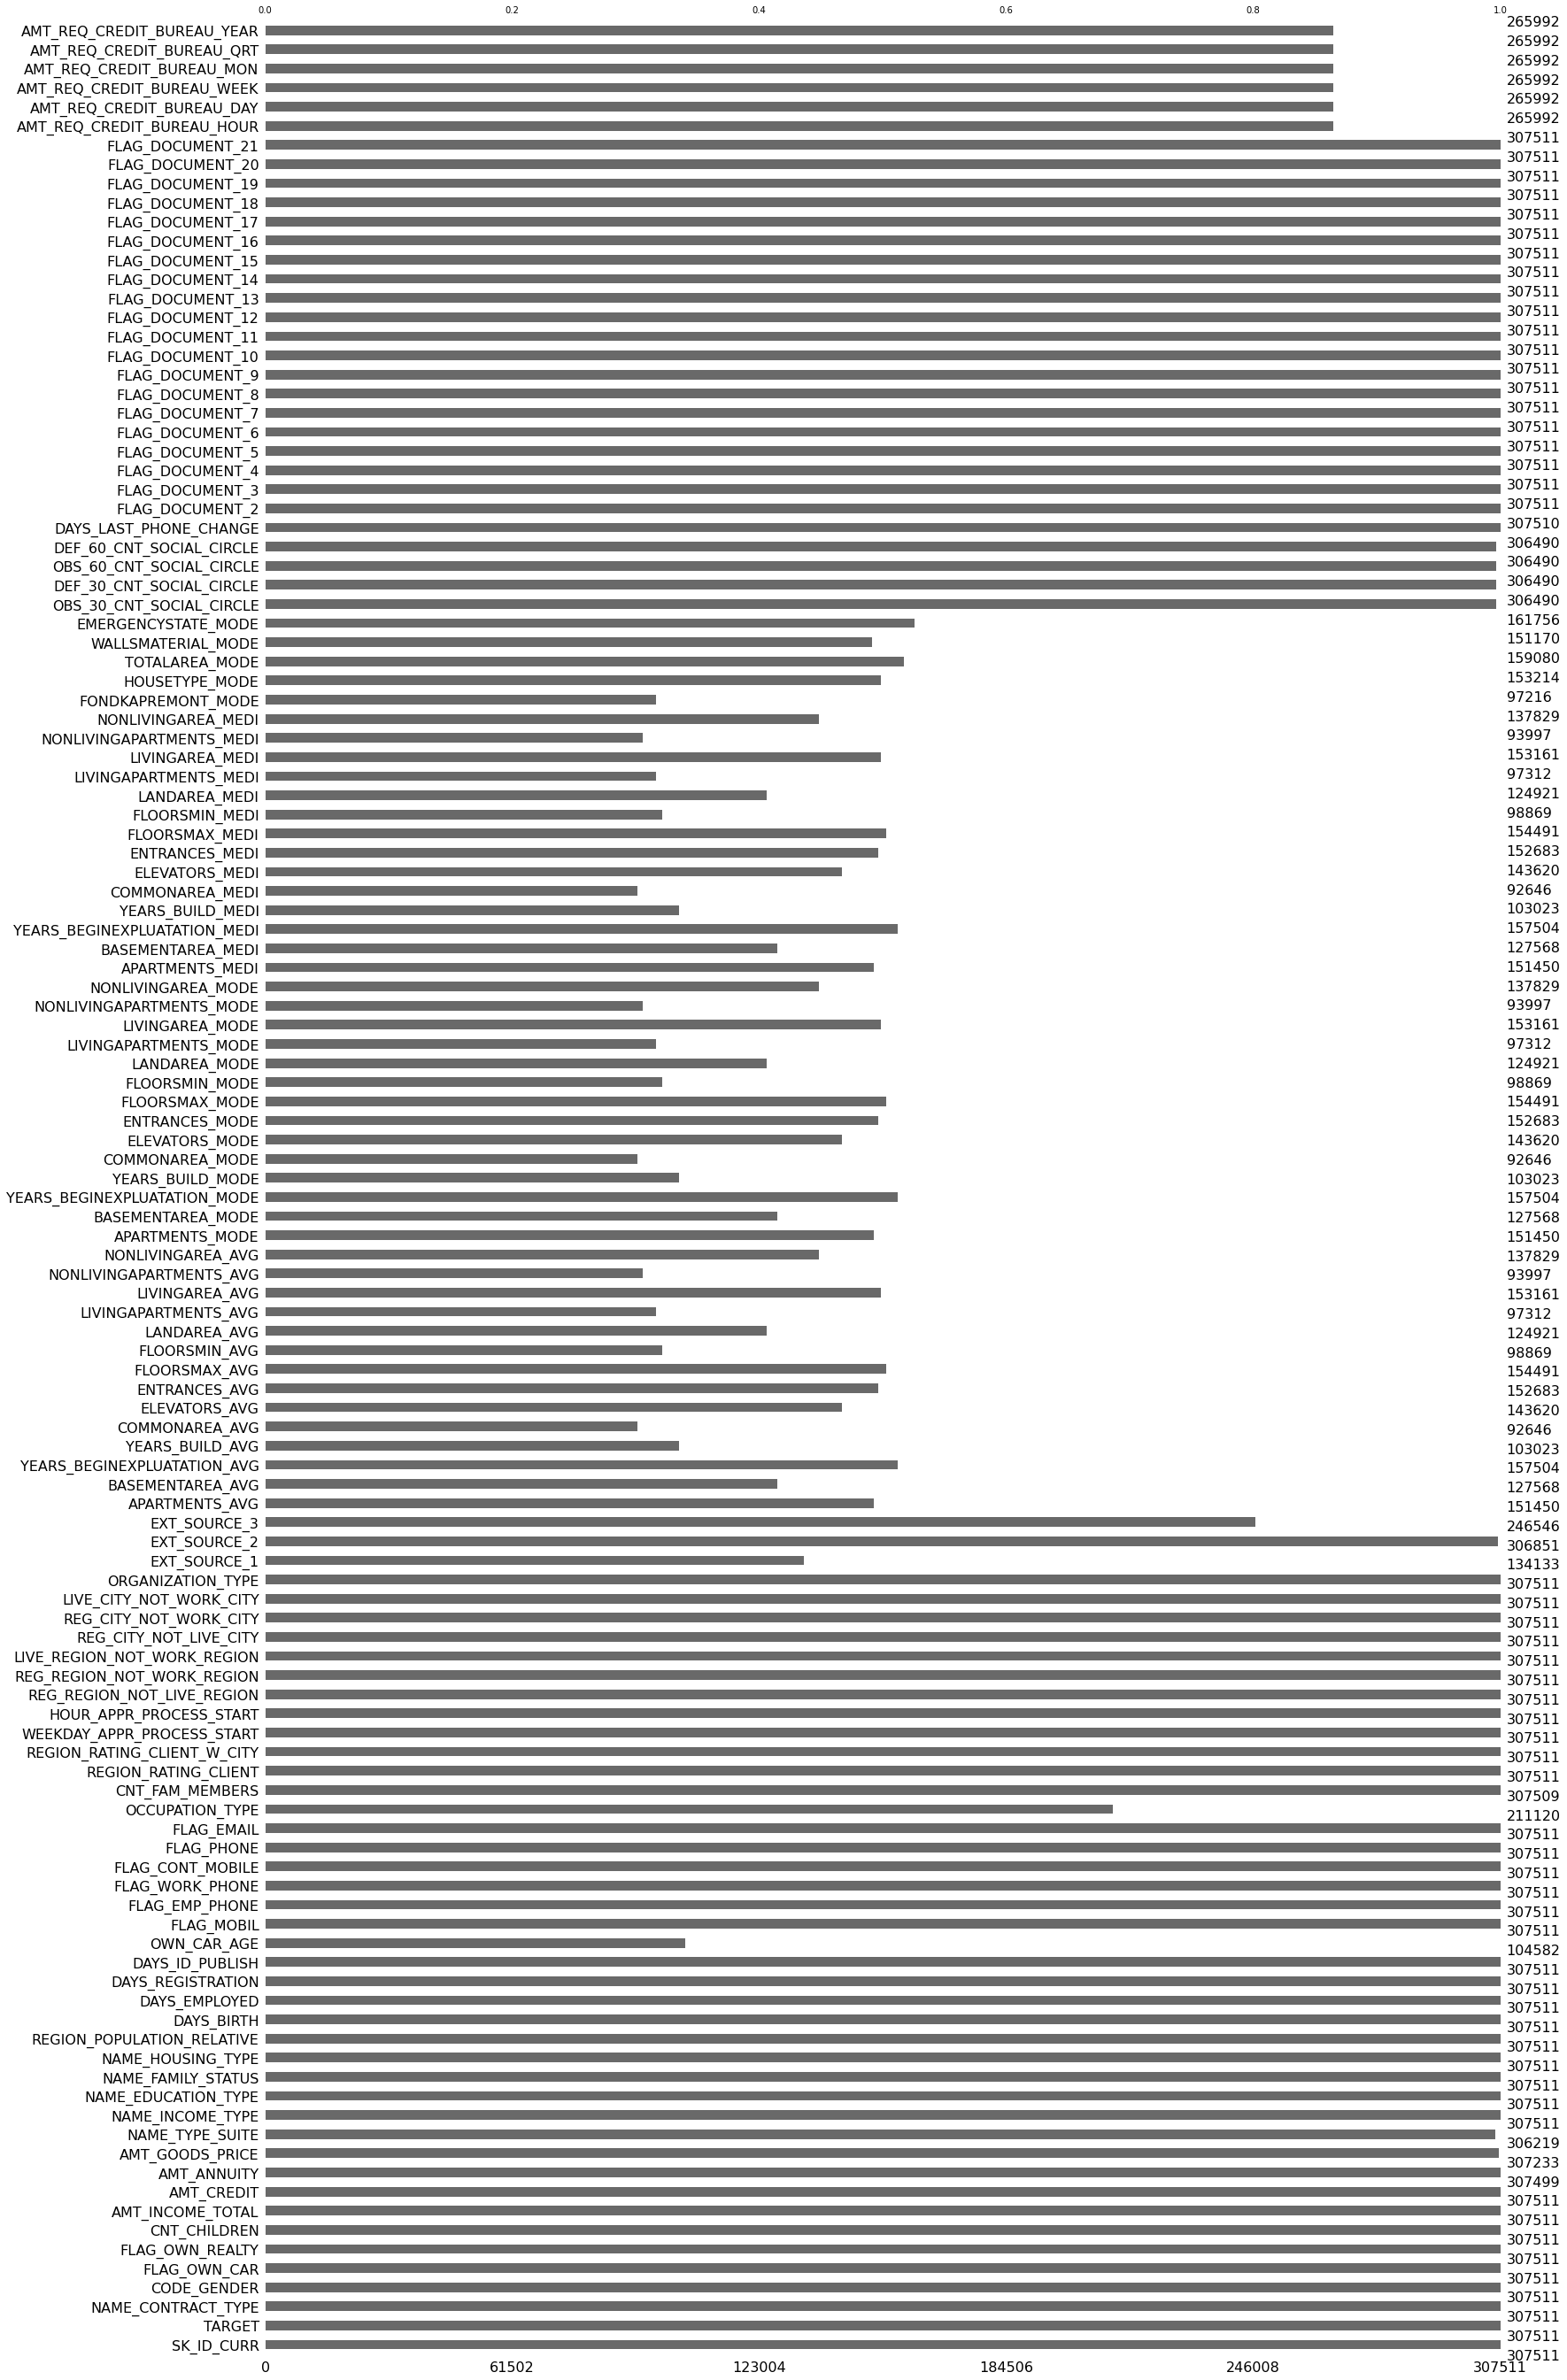

In [ ]:
import missingno as msno
msno.bar(application_train)

In [ ]:
application_train['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [ ]:
missing_data(application_test).head(20)

,total,count,percent
SK_ID_CURR,0,48744,0.000000
NAME_CONTRACT_TYPE,0,48744,0.000000
CODE_GENDER,0,48744,0.000000
FLAG_OWN_CAR,0,48744,0.000000
FLAG_OWN_REALTY,0,48744,0.000000
CNT_CHILDREN,0,48744,0.000000
AMT_INCOME_TOTAL,0,48744,0.000000
AMT_CREDIT,0,48744,0.000000
AMT_ANNUITY,24,48720,0.049237
AMT_GOODS_PRICE,0,48744,0.000000


###**Check data imbalance**
**TARGET** value 0 means loan is repayed, value 1 means loan is not repayed.

In [ ]:
# temp = application_train["TARGET"].value_counts()
# print(temp)
# df = pd.DataFrame({'labels': temp.index,
#                    'values': temp.values
#                   })
# print(df)
# plt.figure(figsize = (5, 5))
# plt.title('Application loans repayed - train dataset')
# sns.barplot(x = 'labels', y="values", data=df)
# plt.show()

Non-repayment rate: 8.07[%]


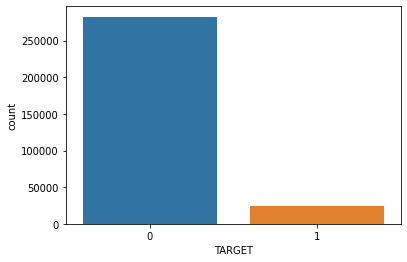

In [ ]:
sns.countplot(x='TARGET', data=application_train)
count_0 = (application_train['TARGET'] == 0).sum()
count_1 = (application_train['TARGET'] == 1).sum()
rate    = (count_1)*100/(count_1 + count_0)
print('Non-repayment rate: {:.2f}[%]'.format(rate))

###Explore the data



1.   Categorical features
2.   Numberical features
3.   Categorical feature by label
4.   Numberical feature by label
5.   Correlation matrix



In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)

    plt.show();

In [ ]:
def plot_stats_test(feature, label_rotation = False):
  temp = application_test[feature].value_counts()
  df = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})
  sns.set_color_codes("pastel")
  s = sns.barplot(x = feature, y="Number of contracts",data=df)
  if(label_rotation):
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    fig = plt.plot(figsize = (12, 12))


In [ ]:
object_application_train = application_train.select_dtypes(['object'])
object_application_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [ ]:
application_train.select_dtypes('object').apply(pd.Series.unique, axis = 0)

NAME_CONTRACT_TYPE                                [Cash loans, Revolving loans]
CODE_GENDER                                                         [M, F, XNA]
FLAG_OWN_CAR                                                             [N, Y]
FLAG_OWN_REALTY                                                          [Y, N]
NAME_TYPE_SUITE               [Unaccompanied, Family, Spouse, partner, Child...
NAME_INCOME_TYPE              [Working, State servant, Commercial associate,...
NAME_EDUCATION_TYPE           [Secondary / secondary special, Higher educati...
NAME_FAMILY_STATUS            [Single / not married, Married, Civil marriage...
NAME_HOUSING_TYPE             [House / apartment, Rented apartment, With par...
OCCUPATION_TYPE               [Laborers, Core staff, Accountants, Managers, ...
WEEKDAY_APPR_PROCESS_START    [WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY...
ORGANIZATION_TYPE             [Business Entity Type 3, School, Government, R...
FONDKAPREMONT_MODE            [reg oper 


1.   Categorical features 






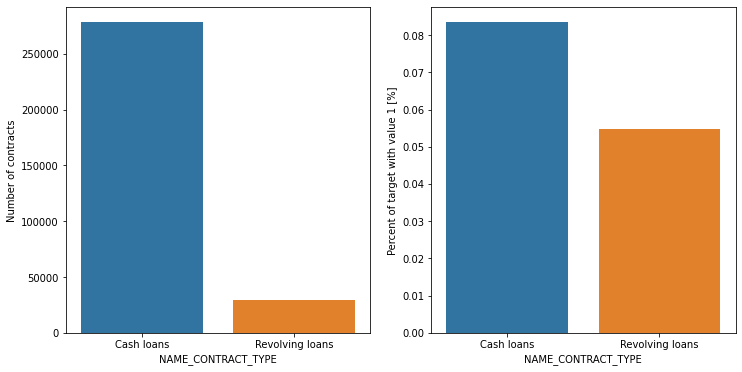

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

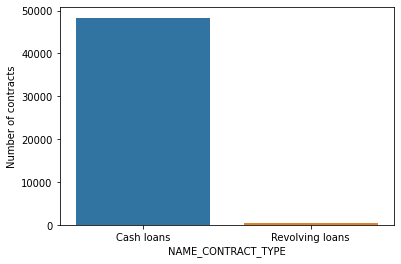

In [ ]:
plot_stats_test('NAME_CONTRACT_TYPE')

In [ ]:
application_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Loại hợp đồng Revolving loans (khoản vay quay vòng) chỉ chiếm khoảng 10% tổng khoản vay ở hình bên trái. Tuy nhiên tỉ lệ khoản vay quay vòng không được hoàn trả là rất cao.

In [ ]:
application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

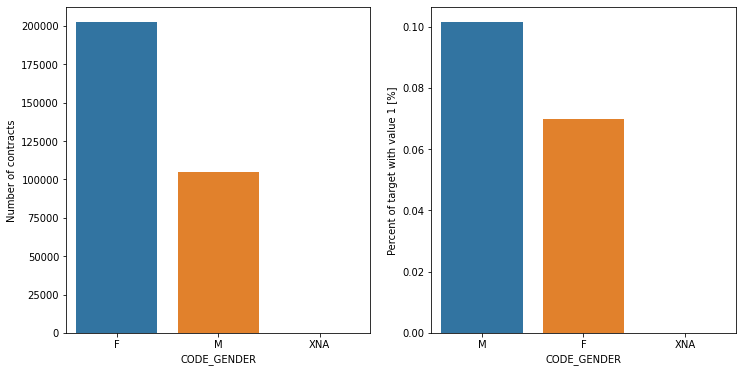

In [ ]:
plot_stats('CODE_GENDER')

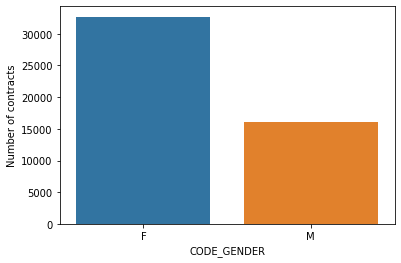

In [ ]:
plot_stats_test('CODE_GENDER')

Số lượng khách hàng nữ gần gấp đôi số lượng khách hàng nam. Nhìn vào tỉ lệ các khoản tín dụng không được hoàn trả, tỉ lệ nam có khả năng không trả nợ cao hơn (~ 10%) so với nữ (~ 7%)

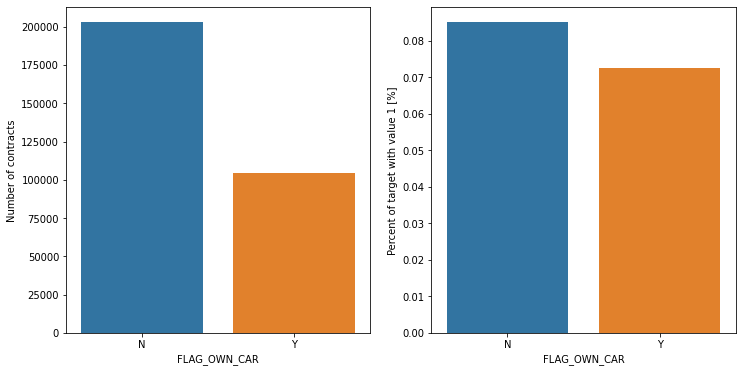

In [ ]:
plot_stats('FLAG_OWN_CAR')

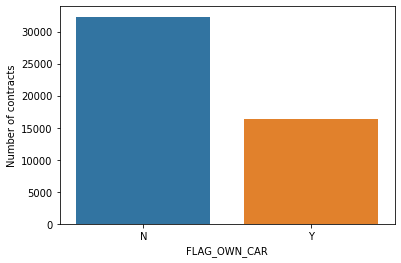

In [ ]:
plot_stats_test('FLAG_OWN_CAR')

Tỉ lệ người có sở hữu ô tô chỉ chiếm một nửa so với người không có ô tô. Tỷ lệ người sở hữu một chiếc ô tô không trả nợ thấp hơn so với người không sở hữu một chiếc ô tô

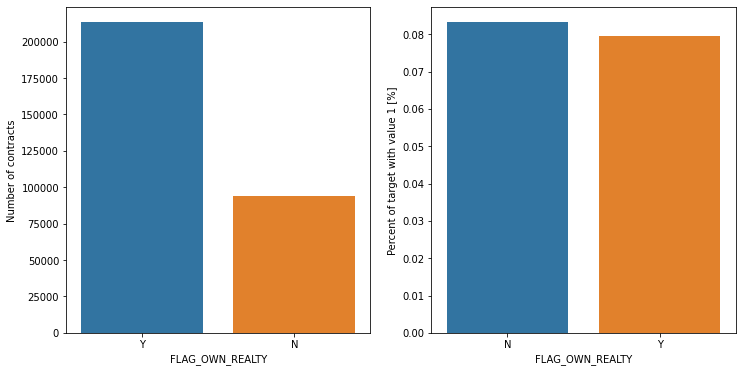

In [ ]:
plot_stats('FLAG_OWN_REALTY')

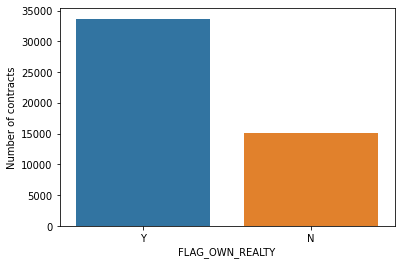

In [ ]:
plot_stats_test('FLAG_OWN_REALTY')

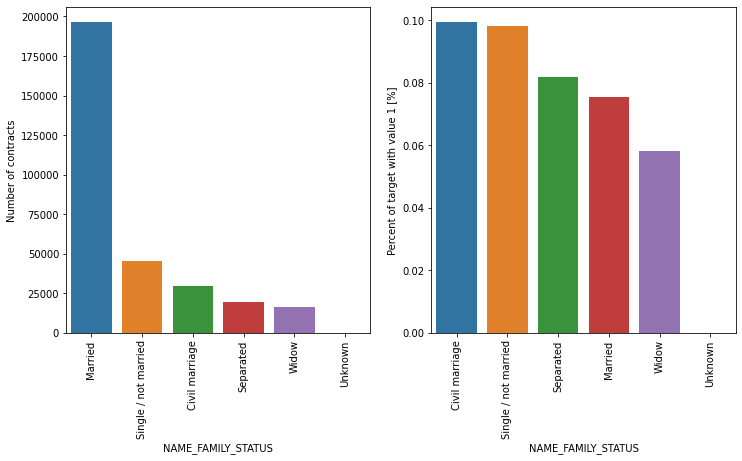

In [ ]:
plot_stats('NAME_FAMILY_STATUS', True, True)

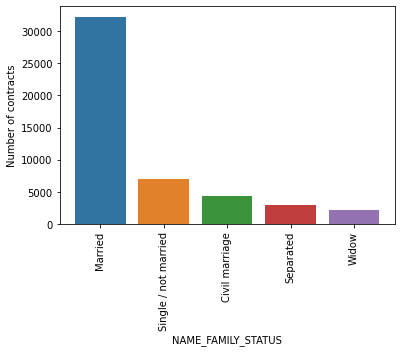

In [ ]:
plot_stats_test('NAME_FAMILY_STATUS', True)

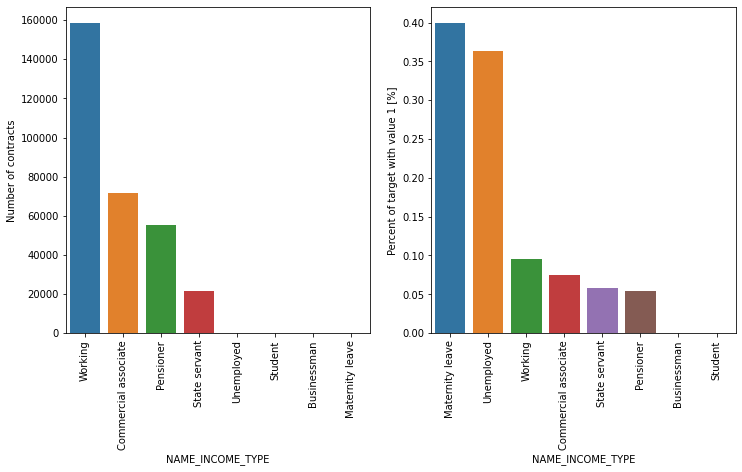

In [ ]:
plot_stats('NAME_INCOME_TYPE', True)

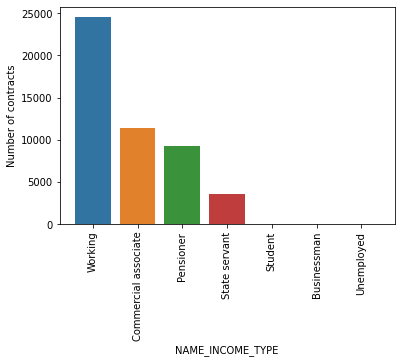

In [ ]:
plot_stats_test('NAME_INCOME_TYPE', True)

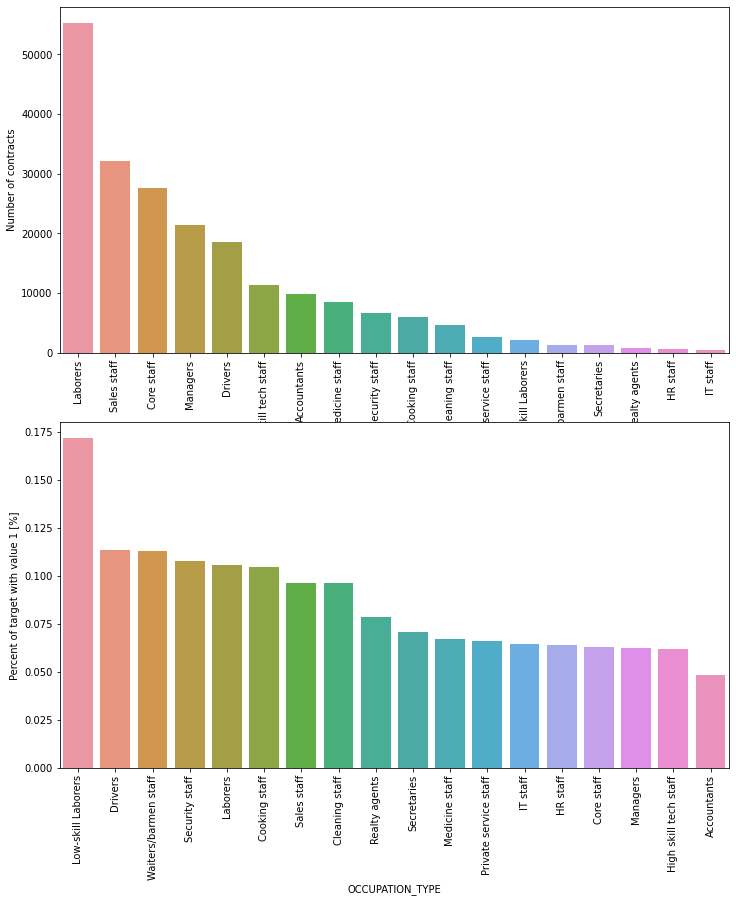

In [ ]:
plot_stats('OCCUPATION_TYPE', True, False)

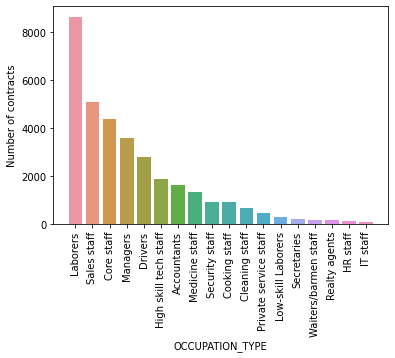

In [ ]:
plot_stats_test('OCCUPATION_TYPE', True)

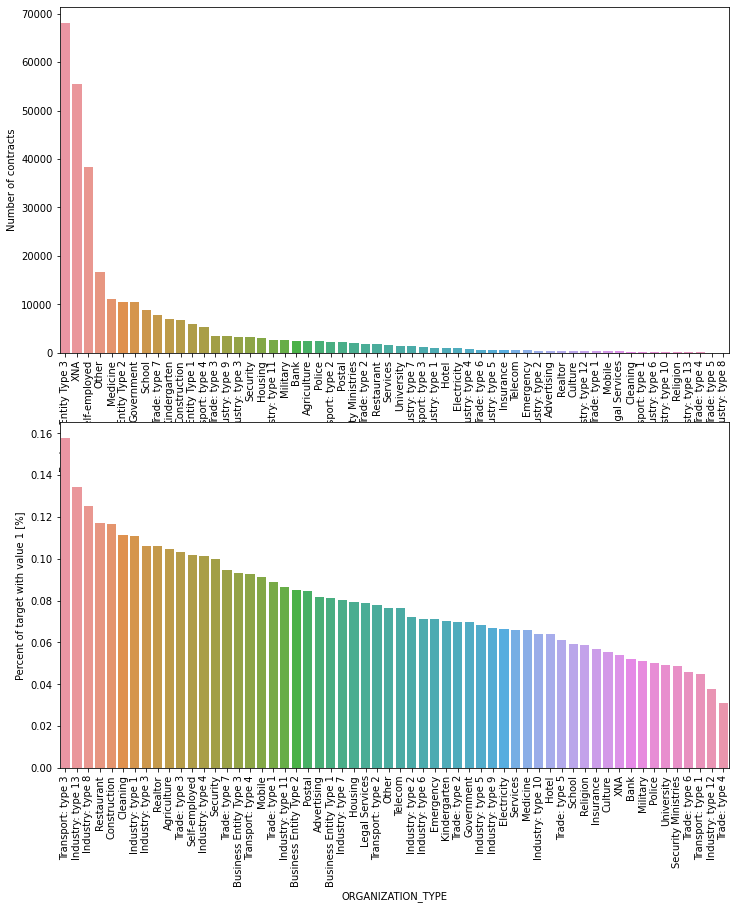

In [ ]:
plot_stats('ORGANIZATION_TYPE', True, False)

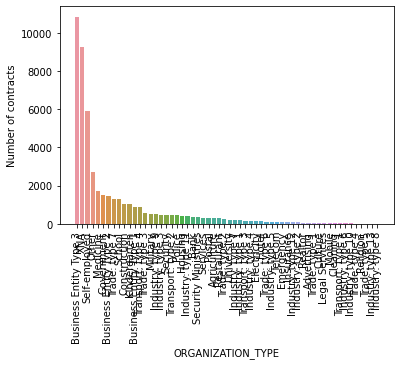

In [ ]:
plot_stats_test('ORGANIZATION_TYPE', True)

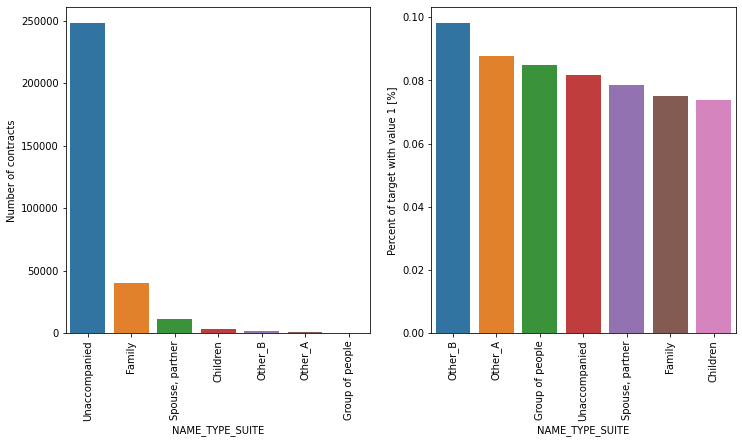

In [ ]:
plot_stats('NAME_TYPE_SUITE', True, True)

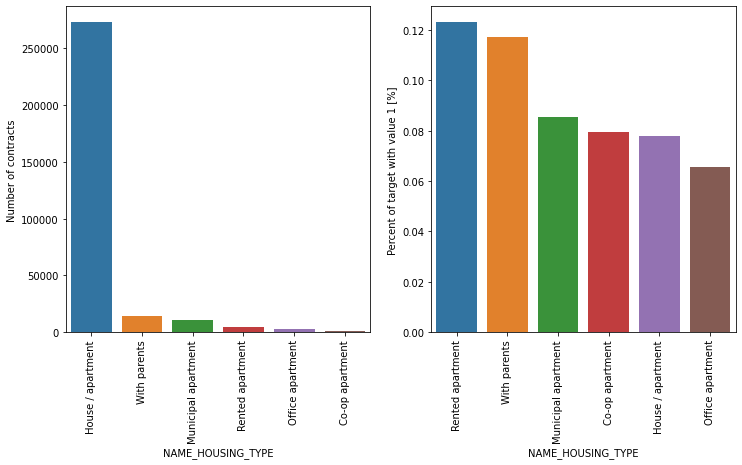

In [ ]:
plot_stats('NAME_HOUSING_TYPE', True, True)

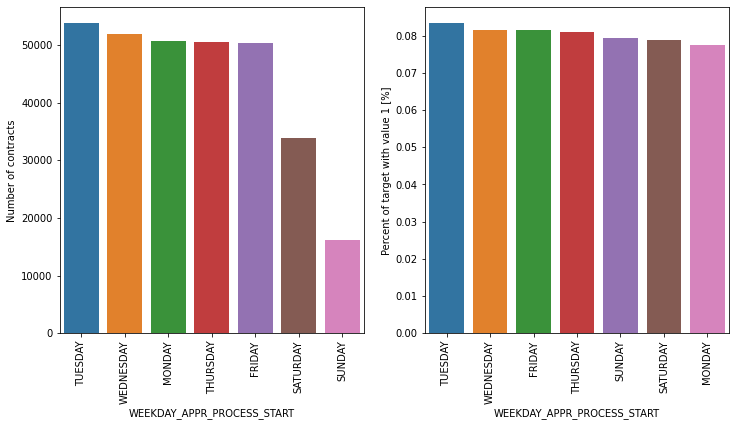

In [ ]:
plot_stats('WEEKDAY_APPR_PROCESS_START', True)

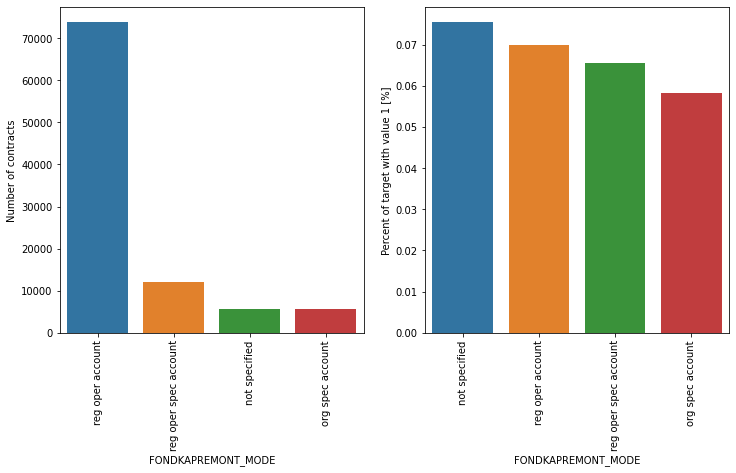

In [ ]:
plot_stats('FONDKAPREMONT_MODE', True)

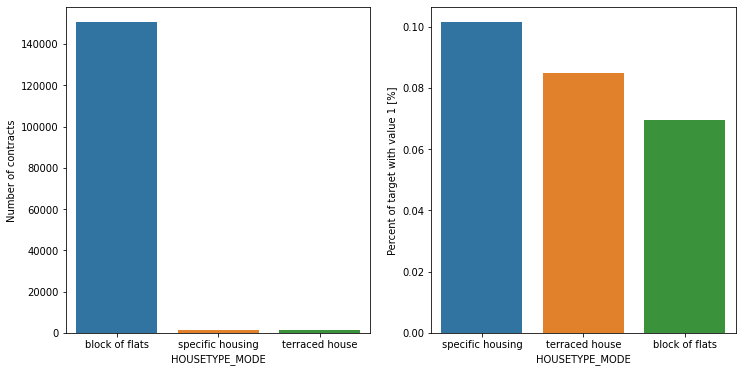

In [ ]:
plot_stats('HOUSETYPE_MODE')

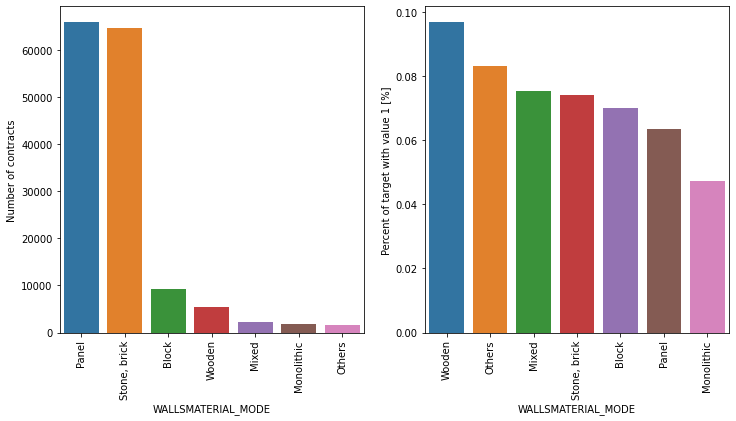

In [ ]:
plot_stats('WALLSMATERIAL_MODE', True)

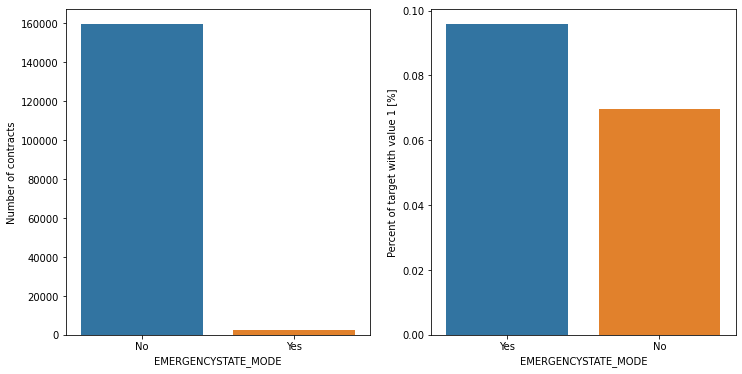

In [ ]:
plot_stats('EMERGENCYSTATE_MODE')

In [ ]:
(application_train['DAYS_BIRTH'] / 365).describe()

count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

Text(0.5, 0, 'Age (years)')

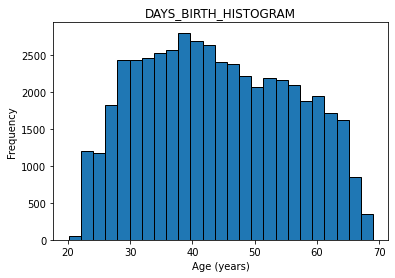

In [ ]:
(application_test['DAYS_BIRTH']/-365).plot.hist(title = 'DAYS_BIRTH_HISTOGRAM', edgecolor = 'k', bins = 25)
plt.xlabel('Age (years)')

####Effect of Age on Repayment

In [ ]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982694

Mối tương quan giữa biến tuổi và biến mục tiêu là âm, có nghĩa là khi tuổi tăng lên thì biến mục tiêu giảm về 0, tức khi khách hàng già đi họ có xu hướng trả nợ đúng hạn hơn

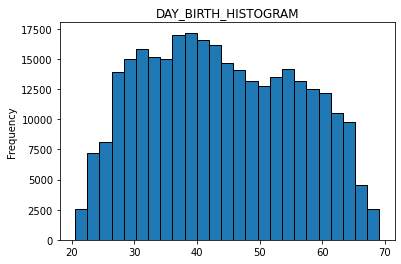

In [ ]:
(application_train['DAYS_BIRTH']/-365).plot.hist(title = 'DAY_BIRTH_HISTOGRAM', edgecolor = 'k', bins = 25)

Độ tuổi của khách hàng nằm trong khoảng 20-70 => hợp lý

Vẽ biểu đồ xem xét mối quan hệ giữa tuổi và biến mục tiêu, sử dụng kdeplot

Text(0.5, 1.0, 'Distribution of Ages')

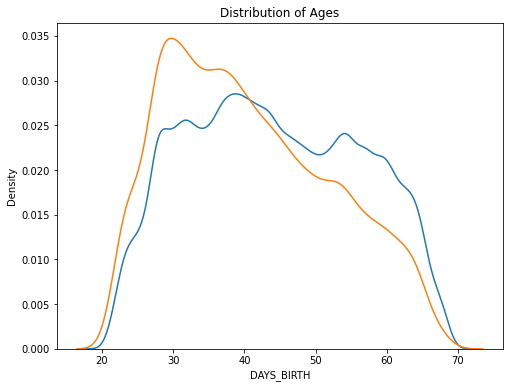

In [ ]:
plt.figure(figsize = (8, 6))
# các khoản vay được trả đúng hạn theo độ tuổi
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label = 'TARGET == 0')
# các khoản vay không được trả đúng hạn theo độ tuổi
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH']/365, label = 'TARGET == 1')
plt.title('Distribution of Ages')

Nhận thấy ở độ tuổi thấp hơn, khách hàng có xu hướng không trả nợ đúng hạn nhiều hơn. 

Cụ thể:

In [ ]:
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data

,TARGET,DAYS_BIRTH
0,1,9461
1,0,16765
2,0,19046
3,0,19005
4,0,19932
...,...,...
307506,0,9327
307507,0,20775
307508,0,14966
307509,1,11961


In [ ]:
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365
# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINED,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]","(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]","(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]","(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]","(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]","(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]","(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]","(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]","(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]","(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]","(35.0, 40.0]"


In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


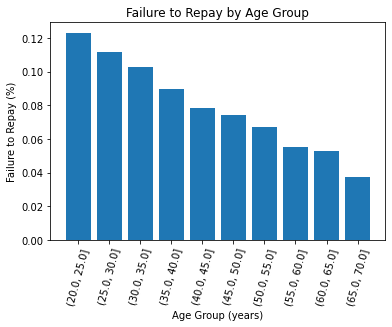

In [ ]:
plt.bar(age_groups.index.astype(str), age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Ratio of failure to Repay by Age Group');

Tỉ lệ tuổi 20-25 không hoàn trả tiền khoảng 12%, cao nhất trong nhóm tuổi. Ba nhóm tuổi trẻ nhất có tỉ lệ không hoàn trả khoảng 10%. Nhóm tuổi già nhất có tỉ lệ không hoàn trả tiền khoảng 4-5%

In [ ]:
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
application_train['DAYS_EMPLOYED'].corr(application_train['TARGET'])

-0.044931662657738715

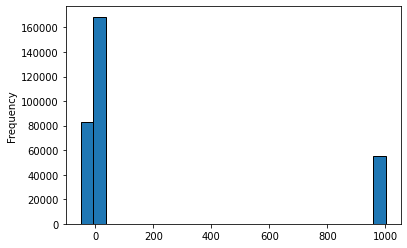

In [ ]:
YEARS_EMPLOYED.plot.hist(edgecolor = 'k', bins = 25)

####EXT_SOURCE

In [ ]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

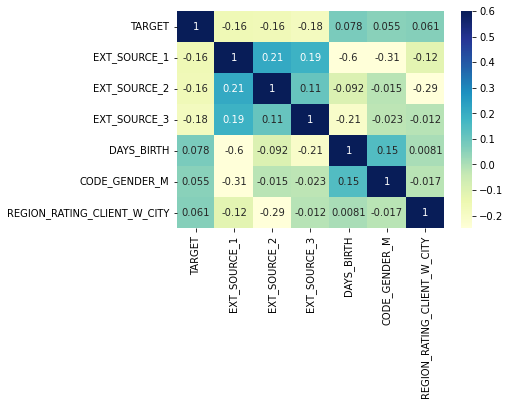

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'CODE_GENDER_M', 'REGION_RATING_CLIENT_W_CITY']]
ext_data_corrs = ext_data.corr()
sns.heatmap(ext_data_corrs, cmap="YlGnBu", vmin = -0.25, annot = True, vmax = 0.6)

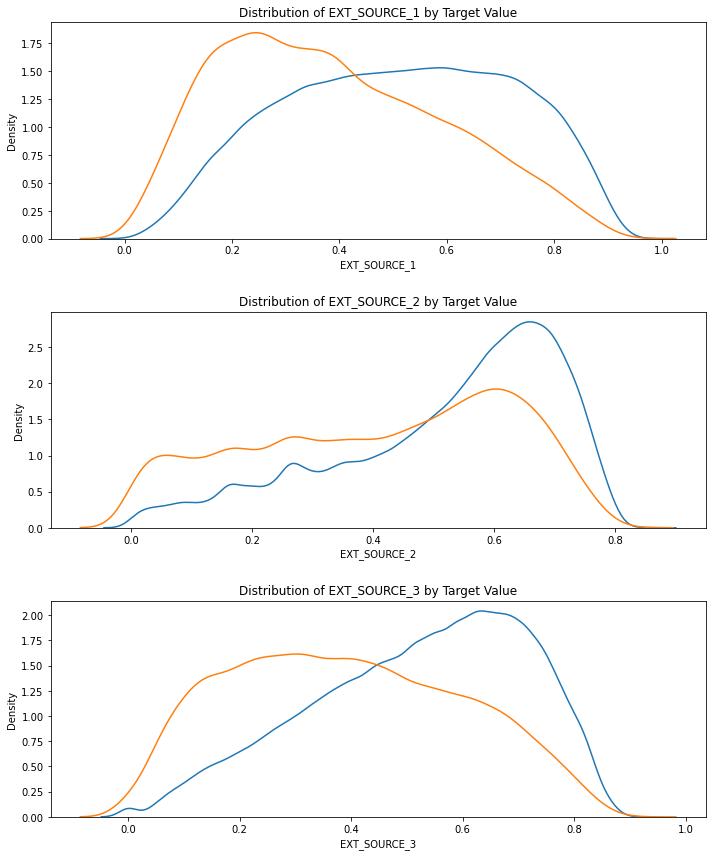

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

Xanh: target = 0, Cam: target = 1

Nhìn chung, khi điểm EXT_SOURCE tăng lên thì khách hàng có xu hướng trả nợ đúng hạn nhiều hơn. Điểm thấp cho tỉ lệ bùng nợ cao hơn

In [ ]:
application_train['YEARS_BIRTH'] = application_train['DAYS_BIRTH']/-365
application_train['YEARS_EMPLOYED'] = application_train['DAYS_EMPLOYED']/-365

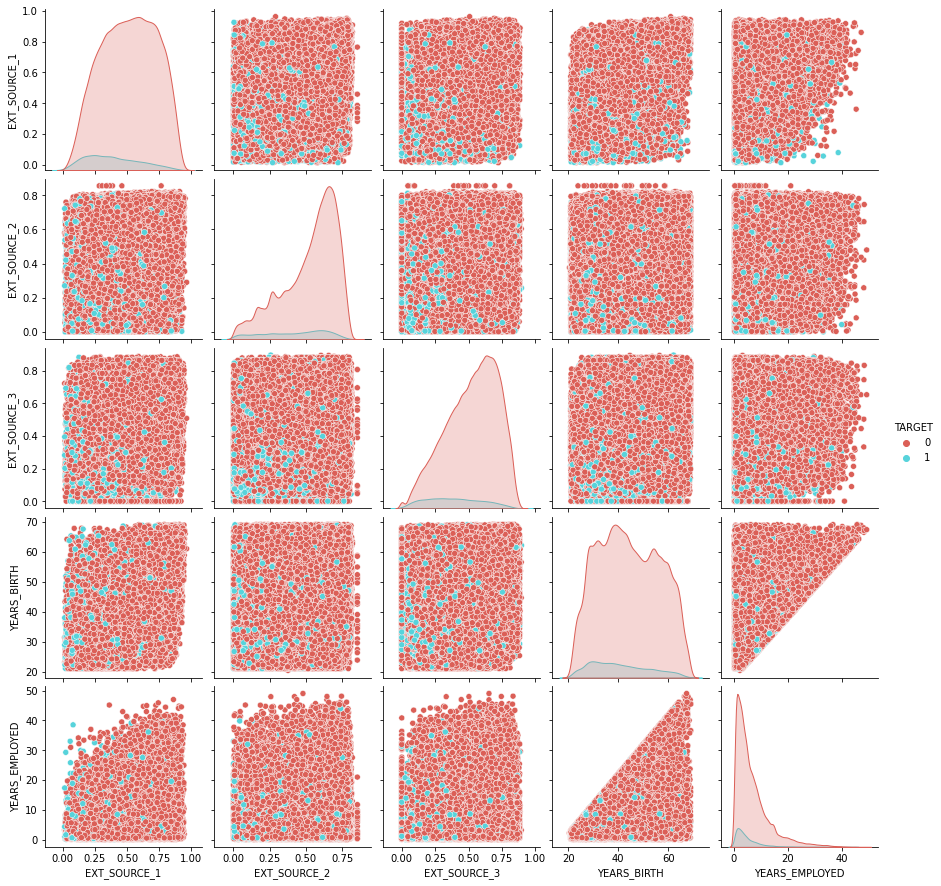

In [ ]:
sns.pairplot(application_train, vars=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BIRTH', 'YEARS_EMPLOYED'], hue = 'TARGET', palette='hls')
plt.show()

In [ ]:
# object_column_name = application_train.columns.values
# for i in range(len(object_column_name)):
#   labels, uniques = pd.factorize(application_train[object_column_name[i]])
#   application_train[object_column_name[i]] = labels

# application_train = application_train.replace(np.nan, -1) 

####AMOUNT_INCOME_TOTAL

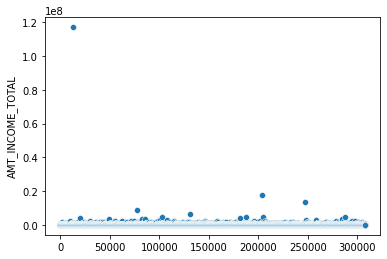

In [8]:
sns.scatterplot(data=application_train['AMT_INCOME_TOTAL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


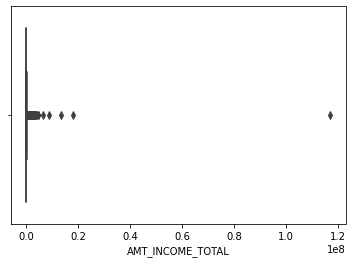

In [15]:
sns.boxplot(application_train['AMT_INCOME_TOTAL'])

In [16]:
application_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

####AMT_ANNUITY
Khoản tiền hoàn trả mỗi tháng

In [17]:
application_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


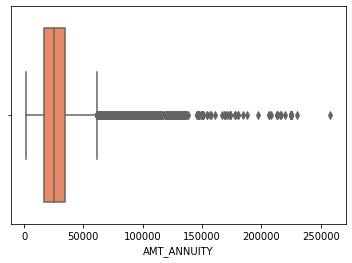

In [18]:
sns.boxplot(application_train['AMT_ANNUITY'], color = "coral")

####AMT_CREDIT
Credit amount of the loan: Số tiền tín dụng của mỗi khoản vay

In [19]:
application_train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


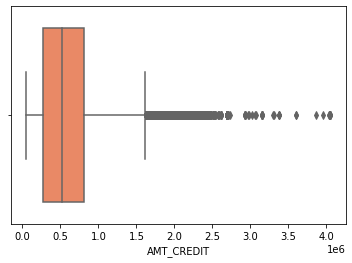

In [20]:
sns.boxplot(application_train['AMT_CREDIT'], color = "coral")

####AMT_GOODS_PRICE
Đối với các khoản cho vay tiêu dùng, đó là giá của hàng hóa mà khoản vay được cho

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


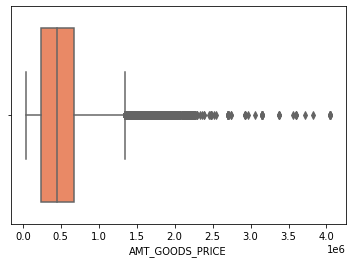

In [21]:
sns.boxplot(application_train['AMT_GOODS_PRICE'], color = "coral")

###One-hot encoding

In [21]:
application_train = pd.get_dummies(application_train, dummy_na=False)
application_test  = pd.get_dummies(application_test)
print(application_train.shape)
print(application_test.shape)

(307511, 246)
(48744, 242)


#**Feature engineering**







###check missing data

In [48]:
def missing_data(data):
  total   = data.isnull().sum()
  count   = data.count()
  percent = (data.isnull().sum()/data.isnull().count()*100) 
  return pd.concat([total, count, percent], axis = 1, keys = ['total', 'count', 'percent'])

In [ ]:
missing_data(application_train).sort_values(by = 'percent').tail(50)

,total,count,percent
AMT_REQ_CREDIT_BUREAU_MON,41519,265992,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,265992,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,265992,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,41519,265992,13.501631
EXT_SOURCE_3,60965,246546,19.825307
TOTALAREA_MODE,148431,159080,48.268517
YEARS_BEGINEXPLUATATION_MEDI,150007,157504,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,157504,48.781019
YEARS_BEGINEXPLUATATION_AVG,150007,157504,48.781019
FLOORSMAX_MODE,153020,154491,49.760822


In [49]:
#set threshold
threshold = 0.67

# dropping columns with missing value rate higher than threshold
application_train = application_train[application_train.columns[application_train.isnull().mean() < threshold]]

In [50]:
missing_data(application_train).sort_values(by = 'percent').tail(50)

,total,count,percent
EXT_SOURCE_2,660,306851,0.214626
DEF_30_CNT_SOCIAL_CIRCLE,1021,306490,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,306490,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,306490,0.332021
OBS_30_CNT_SOCIAL_CIRCLE,1021,306490,0.332021
NAME_TYPE_SUITE,1292,306219,0.420148
AMT_REQ_CREDIT_BUREAU_HOUR,41519,265992,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,265992,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,265992,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,265992,13.501631


###Handle outlier

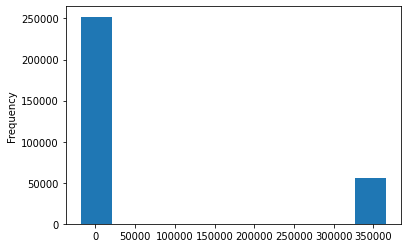

In [ ]:
application_train['DAYS_EMPLOYED'].plot.hist()

In [12]:
application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].replace(365243, np.nan)
application_train['AMT_INCOME_TOTAL'] = application_train['AMT_INCOME_TOTAL'].replace(1.170000e+08, np.nan)

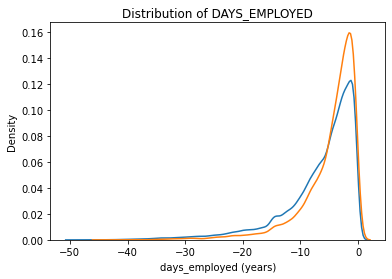

In [ ]:
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_EMPLOYED']/365, label = 'TARGET == 0')
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_EMPLOYED']/365, label = 'TARGET == 1')
plt.xlabel('days_employed (years)'); plt.ylabel('Density'); plt.title('Distribution of DAYS_EMPLOYED');

Màu xanh: target = 0 (hoàn trả đúng hạn), màu cam: target = 1 (hoàn trả không đúng hạn)

Nhận thấy, những người có số năm làm việc ít hơn có khả năng bùng nợ cao hơn

In [ ]:
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      -1954.848123
std        2307.068896
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

###Scaling

#Create Features



*   CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income

*   ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
*   CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
*   DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age



In [13]:
application_train_domain = application_train.copy()
application_test_domain = application_test.copy()

In [14]:
application_train_domain['CREDIT_INCOME_PERCENT'] = application_train_domain['AMT_CREDIT']/application_train_domain['AMT_INCOME_TOTAL']
application_train_domain['ANNUITY_INCOME_PERCENT'] = application_train_domain['AMT_ANNUITY']/application_train_domain['AMT_INCOME_TOTAL']
application_train_domain['DAYS_EMPLOYED_PERCENT'] = application_train_domain['DAYS_EMPLOYED']/application_train_domain['DAYS_BIRTH']
application_train_domain['CREDIT_TERM'] = application_train_domain['AMT_ANNUITY'] / application_train_domain['AMT_CREDIT']

In [15]:
application_test_domain['CREDIT_INCOME_PERCENT'] = application_test_domain['AMT_CREDIT']/application_test_domain['AMT_INCOME_TOTAL']
application_test_domain['ANNUITY_INCOME_PERCENT'] = application_test_domain['AMT_ANNUITY']/application_test_domain['AMT_INCOME_TOTAL']
application_test_domain['DAYS_EMPLOYED_PERCENT'] = application_test_domain['DAYS_EMPLOYED']/application_test_domain['DAYS_BIRTH']
application_test_domain['CREDIT_TERM'] = application_test_domain['AMT_ANNUITY'] / application_test_domain['AMT_CREDIT']

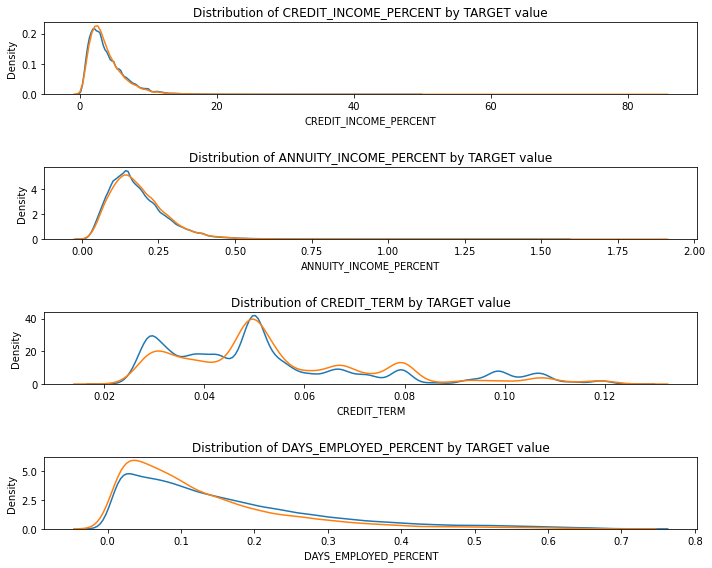

In [37]:
plt.figure(figsize = (10, 8))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
  plt.subplot(4, 1, i+1)
  sns.kdeplot(application_train_domain.loc[application_train_domain['TARGET'] == 0, feature], label = 'TARGET = 0')
  sns.kdeplot(application_train_domain.loc[application_train_domain['TARGET'] == 1, feature], label = 'TARGET = 1')
  plt.title('Distribution of %s by TARGET value' %feature)
  plt.xlabel('%s' %feature)

plt.tight_layout(h_pad = 2.5)

#Model: Random forest

In [13]:
y_train = application_train['TARGET']
X_train = application_train.drop(columns = ['TARGET'])
X_test = application_test

In [ ]:
X_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,0,0,1,0,1,0
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,0,0,1,0,1,0
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,0,1,0,0,1,0
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0,0,1,0,1,0


In [14]:
X_train = X_train.replace(np.nan, -1)
X_test = X_test.replace(np.nan, -1)

In [15]:
X_train, X_test = X_train.align(X_test, join = 'inner', axis = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
X_train

(307511, 242)
(48744, 242)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,-8456.0,...,0,0,0,0,0,0,1,0,1,0
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,-1.0,-4388.0,...,0,0,0,0,0,0,1,0,1,0
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,-6737.0,...,0,0,0,0,0,1,0,0,1,0
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,-2562.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier() 

grid = { 
    'n_estimators': [200,300],
    'max_features': ['auto'],
    'max_depth' : [4,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=random_forest, param_grid=grid, cv= 2)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 7, 8], 'max_features': ['auto'],
                         'n_estimators': [200, 300], 'random_state': [18]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 300,
 'random_state': 18}

In [ ]:
rfc = RandomForestClassifier(random_state=18, max_features='auto', n_estimators= 300, max_depth=7, criterion='gini')

In [ ]:
# Train on the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=18)

In [ ]:
features = list(X_train.columns)
# Extract feature importances
feature_importance_values = rfc.feature_importances_
data = {'features': features, 'importance': feature_importance_values}


In [ ]:
data = pd.DataFrame(data)

In [ ]:
data = data.sort_values(by = 'importance')

In [ ]:
data_importance = data.tail(50)
data_importance.features.unique()

array(['AMT_REQ_CREDIT_BUREAU_WEEK', 'YEARS_BEGINEXPLUATATION_MEDI',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'NAME_CONTRACT_TYPE_Cash loans', 'SK_ID_CURR',
       'HOUR_APPR_PROCESS_START', 'FLAG_OWN_CAR_N',
       'NAME_CONTRACT_TYPE_Revolving loans', 'APARTMENTS_MODE',
       'NAME_FAMILY_STATUS_Married', 'LIVINGAREA_MODE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_INCOME_TOTAL',
       'OCCUPATION_TYPE_Laborers', 'FLAG_OWN_CAR_Y', 'APARTMENTS_AVG',
       'OWN_CAR_AGE', 'LIVINGAREA_AVG', 'FLOORSMAX_MODE',
       'LIVINGAREA_MEDI', 'APARTMENTS_MEDI', 'FLOORSMAX_AVG',
       'REGION_POPULATION_RELATIVE', 'FLOORSMAX_MEDI',
       'REG_CITY_NOT_LIVE_CITY', 'TOTALAREA_MODE', 'AMT_ANNUITY',
       'ORGANIZATION_TYPE_XNA', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_DOCUMENT_3', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION',
       'NAME_INCOME_TYPE_Pensioner', 'REGION_RATING_CLIENT', 'AMT_CREDIT',
       'DAYS_ID_PUBLISH',
       'NAME_EDUCATION_TYPE_Secondary / secondary

In [ ]:
columns = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'YEARS_BEGINEXPLUATATION_MEDI',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_CONTRACT_TYPE_Cash loans', 'SK_ID_CURR',
       'HOUR_APPR_PROCESS_START', 'FLAG_OWN_CAR_N',
       'NAME_CONTRACT_TYPE_Revolving loans', 'APARTMENTS_MODE',
       'NAME_FAMILY_STATUS_Married', 'LIVINGAREA_MODE',
       'AMT_INCOME_TOTAL', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OCCUPATION_TYPE_Laborers', 'FLAG_OWN_CAR_Y', 'OWN_CAR_AGE',
       'APARTMENTS_AVG', 'LIVINGAREA_AVG', 'FLOORSMAX_MODE',
       'LIVINGAREA_MEDI', 'APARTMENTS_MEDI', 'REGION_POPULATION_RELATIVE',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'REG_CITY_NOT_LIVE_CITY',
       'TOTALAREA_MODE', 'AMT_ANNUITY', 'ORGANIZATION_TYPE_XNA',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION',
       'FLAG_EMP_PHONE', 'NAME_INCOME_TYPE_Pensioner',
       'REGION_RATING_CLIENT', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER_M',
       'NAME_INCOME_TYPE_Working', 'CODE_GENDER_F',
       'NAME_EDUCATION_TYPE_Higher education', 'AMT_GOODS_PRICE',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [ ]:
X_train_3 = X_train[columns]
X_train_3

,AMT_REQ_CREDIT_BUREAU_WEEK,YEARS_BEGINEXPLUATATION_MEDI,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,SK_ID_CURR,HOUR_APPR_PROCESS_START,FLAG_OWN_CAR_N,NAME_CONTRACT_TYPE_Revolving loans,APARTMENTS_MODE,...,NAME_INCOME_TYPE_Working,CODE_GENDER_F,NAME_EDUCATION_TYPE_Higher education,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.0,0.9722,2.0,1.0,1,100002,10,1,0,0.0252,...,1,0,0,351000.0,-1134.0,-637,-9461,0.083037,0.262949,0.139376
1,0.0,0.9851,0.0,0.0,1,100003,11,1,0,0.0924,...,0,1,1,1129500.0,-828.0,-1188,-16765,0.311267,0.622246,-1.000000
2,0.0,-1.0000,0.0,0.0,0,100004,9,0,1,-1.0000,...,1,0,0,135000.0,-815.0,-225,-19046,-1.000000,0.555912,0.729567
3,-1.0,-1.0000,0.0,-1.0,1,100006,17,1,0,-1.0000,...,1,1,0,297000.0,-617.0,-3039,-19005,-1.000000,0.650442,-1.000000
4,0.0,-1.0000,0.0,0.0,1,100007,11,1,0,-1.0000,...,1,0,0,513000.0,-1106.0,-3038,-19932,-1.000000,0.322738,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-1.0,0.9876,0.0,-1.0,1,456251,15,1,0,0.1008,...,1,0,0,225000.0,-273.0,-236,-9327,0.145570,0.681632,-1.000000
307507,-1.0,0.9727,0.0,-1.0,1,456252,8,1,0,0.0252,...,0,1,0,225000.0,0.0,365243,-20775,-1.000000,0.115992,-1.000000
307508,0.0,0.9816,0.0,1.0,1,456253,9,1,0,0.1050,...,1,1,1,585000.0,-1909.0,-7921,-14966,0.744026,0.535722,0.218859
307509,0.0,0.9771,0.0,0.0,1,456254,9,1,0,0.0126,...,0,1,0,319500.0,-322.0,-4786,-11961,-1.000000,0.514163,0.661024


In [ ]:
X_test_3 = X_test[columns]
X_test_3

,AMT_REQ_CREDIT_BUREAU_WEEK,YEARS_BEGINEXPLUATATION_MEDI,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,SK_ID_CURR,HOUR_APPR_PROCESS_START,FLAG_OWN_CAR_N,NAME_CONTRACT_TYPE_Revolving loans,APARTMENTS_MODE,...,NAME_INCOME_TYPE_Working,CODE_GENDER_F,NAME_EDUCATION_TYPE_Higher education,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.0,0.9732,0.0,0.0,1,100001,18,1,0,0.0672,...,1,1,1,450000.0,-1740.0,-2329,-19241,0.752614,0.789654,0.159520
1,0.0,-1.0000,0.0,3.0,1,100005,9,1,0,-1.0000,...,1,0,0,180000.0,0.0,-4469,-18064,0.564990,0.291656,0.432962
2,0.0,-1.0000,0.0,4.0,1,100013,14,0,0,-1.0000,...,1,0,1,630000.0,-856.0,-4458,-20038,-1.000000,0.699787,0.610991
3,0.0,0.9970,0.0,3.0,1,100028,11,1,0,0.3109,...,1,1,0,1575000.0,-1805.0,-1866,-13976,0.525734,0.509677,0.612704
4,-1.0,-1.0000,0.0,-1.0,1,100038,5,0,0,-1.0000,...,1,0,0,625500.0,-821.0,-2191,-13040,0.202145,0.425687,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.0,-1.0000,0.0,1.0,1,456221,16,1,0,-1.0000,...,1,1,0,270000.0,-684.0,-5169,-19970,-1.000000,0.648575,0.643026
48740,-1.0,-1.0000,0.0,-1.0,1,456222,11,1,0,-1.0000,...,0,1,0,495000.0,0.0,-1149,-11186,-1.000000,0.684596,-1.000000
48741,0.0,0.9955,0.0,1.0,1,456223,12,0,0,0.1134,...,0,1,0,315000.0,-838.0,-3037,-15922,0.733503,0.632770,0.283712
48742,0.0,0.9896,0.0,2.0,1,456224,10,1,0,0.1660,...,0,0,1,450000.0,-2308.0,-2731,-13968,0.373090,0.445701,0.595456


In [ ]:
# Đưa ra dự đoán về dữ liệu thử nghiệm
predictions = random_forest.predict_proba(X_test)[:, 1]

In [ ]:
predictions[0:5]

In [ ]:
# Tao mot file csv dau ra voi 2 cot SK_ID_CURR va TARGET, day chinh la du doan ve du lieu 
submit = X_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_2.csv', index=False)

In [ ]:
# len(application_train.columns)

In [ ]:
# del application_train['SK_ID_CURR']
# del application_train["OCCUPATION_TYPE"]

In [ ]:
# target = application_train['TARGET']
# feature = application_train.iloc[:, 1:len(application_train.columns)]
# model.fit(feature, target)

In [ ]:
# rank = np.argsort(-model.feature_importances_)
# f, ax = plt.subplots(figsize=(15, 15)) 
# sns.barplot(x=model.feature_importances_[rank], y=application_train.columns.values[rank], orient='h')
# ax.set_xlabel("Importance")
# plt.tight_layout()
# plt.show()

In [ ]:
# for i in range(0, 50):
#     print("Rank{} => {} (Importance={:.3f})".format(i+1, application_train.columns.values[rank[i]], model.feature_importances_[rank[i]]))

#Model: Linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Tạo model với tham số chính quy được chỉ định
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.0001)

In [ ]:
# Dự đoán dữ liệu thử nghiệm
# [:, 1] để đảm bảo rằng chỉ chọn cột thứ 2 để lưu y_pred
y_pred = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
submit = X_test[['SK_ID_CURR']]
submit['TARGET'] = y_pred
submit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.096370
1,100005,0.103161
2,100013,0.063007
3,100028,0.031608
4,100038,0.076384


In [ ]:
# lưu vào file csv
submit.to_csv('Logistic_regression.csv', index = False)

#Model: LightGBM

In [ ]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(application_train.shape[1])

# Create the model with several hyperparameters
model = ltb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

## Lightgbm kfold

In [30]:
# Create the kfold object
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
def cross_validation(X, y, model):
    result= cross_val_score(model, X, y, cv=kfold, scoring="roc_auc", n_jobs=-1)
    print("Score: %f" % result.mean())
    
# ----------------------------------------------------------
def RndSrch_Tune(model, X, y, params):
    
    clf = RandomizedSearchCV(model, params, scoring ='roc_auc', cv = kfold, n_jobs=-1, random_state=100)
    clf.fit(X, y)
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)
    return (clf.best_score_)

In [31]:
# Value of hyperparameters for random search

param_lgb = {'learning_rate':[0.2,0.1,0.01,0.05,0.001],
             'num_leaves':range(10,100,10),
             'min_child_samples':range(500,1000,100),
             'reg_alpha':[0.1,0.01,0.2,0.3],
             'reg_lambda':[0.1,0.01,0.2,0.3],
            'n_estimators':range(50,300,50),
             'max_bin': range(500,1500,100)}

RndSrch_Tune(ltb.LGBMClassifier(random_state = 100, n_jobs=-1, class_weight = 'balanced'), 
             X_train, y_train, param_lgb)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best score is : 0.7572659252830789
best estimator is : LGBMClassifier(class_weight='balanced', max_bin=500, min_child_samples=800,
               num_leaves=70, random_state=100, reg_alpha=0.2, reg_lambda=0.1)
best Params is : {'reg_lambda': 0.1, 'reg_alpha': 0.2, 'num_leaves': 70, 'n_estimators': 100, 'min_child_samples': 800, 'max_bin': 500, 'learning_rate': 0.1}


0.7572659252830789

In [16]:
for i in range(2):
    
  # Split into training and validation set
  # train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
  
  cnt = 1
  for train_index, test_index in cv.split(X_train):
    # Training data for the fold
    train_feature, train_label = X_train.iloc[train_index], y_train.iloc[train_index]
    # Validation data for the fold
    val_feature, val_label = X_train.iloc[test_index], y_train.iloc[test_index]
    # Create the model
    model = ltb.LGBMClassifier()  

    # Train the model
    model.fit(train_feature, train_label, early_stopping_rounds=100, eval_set = [(val_feature, val_label)], 
              eval_metric = 'auc', verbose = 200)
    
    

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.245733	valid_0's auc: 0.754979
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[86]	valid_0's binary_logloss: 0.250618	valid_0's auc: 0.758182
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.249234	valid_0's auc: 0.750602
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[96]	valid_0's binary_logloss: 0.245179	valid_0's auc: 0.758094
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.244016	valid_0's auc: 0.757095
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[73]	valid_0'

In [ ]:
y_predict = model.predict_proba(X_test_3)[:, 1]

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,train_feature.columns)), columns=['Value','Feature'])

plt.figure(figsize=(200, 100))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

In [ ]:
feature_imp.tail(20).Feature.unique()

array(['CODE_GENDER_F', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START',
       'OWN_CAR_AGE', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
       'SK_ID_CURR', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'EXT_SOURCE_2',
       'AMT_CREDIT', 'EXT_SOURCE_3'], dtype=object)

In [ ]:
columns = ['CODE_GENDER_F', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START',
       'OWN_CAR_AGE', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
       'SK_ID_CURR', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'EXT_SOURCE_2',
       'AMT_CREDIT', 'EXT_SOURCE_3']

In [ ]:
X_train_2 = X_train[columns]

In [ ]:
application_train[["TARGET"]]

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [ ]:
train_feature_importance_lightgbm = feature_imp.tail(30)

In [ ]:
submit = X_test_3[['SK_ID_CURR']]
submit['TARGET'] = y_predict
submit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.033467
1,100005,0.059896
2,100013,0.022495
3,100028,0.044581
4,100038,0.137415


In [ ]:
submit.to_csv('Ligthgbm_feature_importance.csv', index=False)

##**With domain feature**

In [22]:
application_train_domain = pd.get_dummies(application_train_domain, dummy_na=False)
application_test_domain  = pd.get_dummies(application_test_domain)
print(application_train_domain.shape)
print(application_test_domain.shape)

(307511, 250)
(48744, 246)


In [23]:
y_train_domain = application_train_domain['TARGET']
X_train_domain = application_train_domain.drop(columns = ['TARGET'])
X_test_domain = application_test_domain

In [24]:
X_train_domain, X_test_domain = X_train_domain.align(X_test_domain, join = 'inner', axis = 1)

In [ ]:
X_train_domain['ANNUITY_INCOME_PERCENT']

0         0.121978
1         0.132217
2         0.100000
3         0.219900
4         0.179963
            ...   
307506    0.174971
307507    0.166687
307508    0.195941
307509    0.118158
307510    0.311857
Name: ANNUITY_INCOME_PERCENT, Length: 307511, dtype: float64

In [ ]:
for i in range(2):
    
  # Split into training and validation set
  # train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
  
  # Create the kfold object
  cv = KFold(n_splits=5, random_state=None, shuffle=False)
  cnt = 1
  for train_index, test_index in cv.split(X_train_domain):
    # Training data for the fold
    train_feature, train_label = X_train_domain.iloc[train_index], y_train_domain.iloc[train_index]
    # Validation data for the fold
    val_feature, val_label = X_train_domain.iloc[test_index], y_train_domain.iloc[test_index]
    # Create the model
    model = ltb.LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.1,
        num_leaves=123,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=15,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
    )  

    # Train the model
    model.fit(train_feature, train_label, early_stopping_rounds=100, eval_set = [(val_feature, val_label)], 
              eval_metric = 'auc', verbose = 200)
    
    

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[46]	valid_0's auc: 0.758178	valid_0's binary_logloss: 0.24522
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[83]	valid_0's auc: 0.766853	valid_0's binary_logloss: 0.248261
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[64]	valid_0's auc: 0.754805	valid_0's binary_logloss: 0.248075
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[71]	valid_0's auc: 0.764134	valid_0's binary_logloss: 0.244018
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.762446	valid_0's binary_logloss: 0.242917
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[46]	valid_0's auc: 0.758178	valid_0's binary_logloss: 0.24522
Training until validation scor

In [ ]:
y_predict_domain_lighgbm = model.predict_proba(X_test_domain)[:, 1]

In [ ]:
submit = X_test_domain[['SK_ID_CURR']]
submit['TARGET'] = y_predict_domain_lighgbm
submit.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.053121
1,100005,0.055329
2,100013,0.016940
3,100028,0.060797
4,100038,0.163625
5,100042,0.024535
6,100057,0.024812
7,100065,0.059126
8,100066,0.020416
9,100067,0.108112


In [ ]:
submit.to_csv('domain_lightgbm_kfold.csv', index=False)

##Lightgbm feature importance and kfold and domain

50 feature importance (random forest) and 4 feature are created

In [27]:
columns = ['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'CREDIT_TERM','AMT_REQ_CREDIT_BUREAU_WEEK', 'YEARS_BEGINEXPLUATATION_MEDI',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_CONTRACT_TYPE_Cash loans', 'SK_ID_CURR',
       'HOUR_APPR_PROCESS_START', 'FLAG_OWN_CAR_N',
       'NAME_CONTRACT_TYPE_Revolving loans', 'APARTMENTS_MODE',
       'NAME_FAMILY_STATUS_Married', 'LIVINGAREA_MODE',
       'AMT_INCOME_TOTAL', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OCCUPATION_TYPE_Laborers', 'FLAG_OWN_CAR_Y', 'OWN_CAR_AGE',
       'APARTMENTS_AVG', 'LIVINGAREA_AVG', 'FLOORSMAX_MODE',
       'LIVINGAREA_MEDI', 'APARTMENTS_MEDI', 'REGION_POPULATION_RELATIVE',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'REG_CITY_NOT_LIVE_CITY',
       'TOTALAREA_MODE', 'AMT_ANNUITY', 'ORGANIZATION_TYPE_XNA',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION',
       'FLAG_EMP_PHONE', 'NAME_INCOME_TYPE_Pensioner',
       'REGION_RATING_CLIENT', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER_M',
       'NAME_INCOME_TYPE_Working', 'CODE_GENDER_F',
       'NAME_EDUCATION_TYPE_Higher education', 'AMT_GOODS_PRICE',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [28]:
X_train_4 = X_train_domain[columns]

In [29]:
X_test_4 = X_test_domain[columns]

In [ ]:
for i in range(2):
    
  # Split into training and validation set
  # train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
  
  # Create the kfold object
  cv = KFold(n_splits=5, random_state=None, shuffle=False)
  cnt = 1
  for train_index, test_index in cv.split(X_train_4):
    # Training data for the fold
    train_feature, train_label = X_train_4.iloc[train_index], y_train_domain.iloc[train_index]
    # Validation data for the fold
    val_feature, val_label = X_train_4.iloc[test_index], y_train_domain.iloc[test_index]
    
    # Create the model
    model = ltb.LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.1,
        num_leaves=123,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=15,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
    )  

    # Train the model
    model.fit(train_feature, train_label, early_stopping_rounds=100, eval_set = [(val_feature, val_label)], 
              eval_metric = 'auc', verbose = 200)
    
    

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's auc: 0.759473	valid_0's binary_logloss: 0.244679
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[84]	valid_0's auc: 0.763921	valid_0's binary_logloss: 0.248919
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[56]	valid_0's auc: 0.75622	valid_0's binary_logloss: 0.247742
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[55]	valid_0's auc: 0.764188	valid_0's binary_logloss: 0.244022
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[66]	valid_0's auc: 0.761632	valid_0's binary_logloss: 0.243033
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's auc: 0.759473	valid_0's binary_logloss: 0.244679
Training until validation sco

In [ ]:
y_predict_domain_lighgbm_feature_importance = model.predict_proba(X_test_4)[:, 1]

In [ ]:
submit = X_test_4[['SK_ID_CURR']]
submit['TARGET'] = y_predict_domain_lighgbm_feature_importance
submit.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.044935
1,100005,0.073364
2,100013,0.014503
3,100028,0.039544
4,100038,0.137267


In [ ]:
submit.to_csv('lightgbm_domain_lighgbm_feature_importance.csv', index=False)

##Lightgbm_StratifiedKfold

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True)
for train_index, test_index in skf.split(X_train, y_train):
  # Training data for the fold
    train_feature, train_label = X_train.iloc[train_index], y_train.iloc[train_index]
    # Validation data for the fold
    val_feature, val_label = X_train.iloc[test_index], y_train.iloc[test_index]
    # Create the model
    model = ltb.LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.1,
        num_leaves=123,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=15,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
    )  

    # Train the model
    model.fit(train_feature, train_label, early_stopping_rounds=100, eval_set = [(val_feature, val_label)], 
              eval_metric = 'auc', verbose = 200)
    

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.247585	valid_0's auc: 0.752878
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.248656	valid_0's auc: 0.750957
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.247524	valid_0's auc: 0.755236
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.247329	valid_0's auc: 0.755322
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.246461	valid_0's auc: 0.75698


In [ ]:
y_pred_skf = model.predict_proba(X_test)[:, 1]

In [ ]:
submit = X_test[['SK_ID_CURR']]
submit['TARGET'] = y_pred_skf
submit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.031771
1,100005,0.067207
2,100013,0.015108
3,100028,0.029372
4,100038,0.150851


In [ ]:
submit.to_csv('lightgmb_stratifiedkfold.csv', index=False)

Stratifiedkfold su dung tap du lieu ban dau cho private score 0.73675, su dung tap dl importance feature cho 0.73865. Kfold cho 0.74008 voi importance, khong importance feature cho 0.73839

#Random forest retrain

In [ ]:
rfc = RandomForestClassifier(random_state=18, max_features='auto', n_estimators= 300, max_depth=7, criterion='gini')
rfc.fit(X_train_3, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=18)

In [ ]:
y_pre_3 = rfc.predict_proba(X_test_3)[:, 1]

In [ ]:
submit = X_test_3[['SK_ID_CURR']]
submit['TARGET'] = y_pre_3
submit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.067270
1,100005,0.107936
2,100013,0.047415
3,100028,0.049111
4,100038,0.129067


In [ ]:
submit.to_csv('random_forest_feature_importance.csv', index = False)

#Catboost